* country — название страны;
* child_mort — показатель смертности детей до 5 лет;
* exports — показатель экспорта на душу населения;
* health — показатель затрат на здравоохранение на душу населения;
* imports — показатель импорта на душу населения;
* Income — средний доход на душу населения;
* Inflation — годовой показатель инфляции;
* life_expec — средняя продолжительность жизни;
* total_fer — суммарный коэффициент рождаемости;
* gdpp — значение ВВП на душу населения.

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler # Стандартзация данных

from sklearn.decomposition import PCA # понижение размерности признаков

from sklearn.cluster import KMeans # кластеризация

from sklearn.metrics import silhouette_score # импортируем метрику силуэт

import seaborn as sns # Графика
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../data/Country-data.zip')
display(df.shape)
df.head()

(167, 10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# df.info()
# print(df.isnull().sum().sum(),': суммарно пропусков в данных')
# print(df.isnull().sum())

In [5]:
# df.country.nunique()

### Задание 7.1
Каково максимальное значение показателя средней продолжительности жизни среди представленных стран? Ответ округлите до одного знака после точки-разделителя.

In [6]:
df.life_expec.max()

82.8

### Задание 7.2
Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя.

In [7]:
X = StandardScaler().fit_transform(df.drop('country', axis=1))
print(round(X[0,0],2), ' самое первое значение в самой первой строке (X_norm[0][0])')

1.29  самое первое значение в самой первой строке (X_norm[0][0])


### Задание 7.3
Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один и таким образом уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки.

Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

<Axes: >

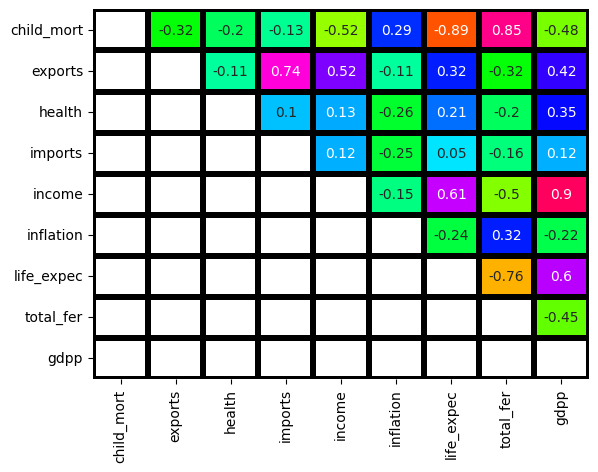

In [8]:
temp=df.corr(numeric_only=True).round(2)
#  фильтор
filtr_1=np.tril(temp)

sns.heatmap(temp, # df
            annot=True, # вывод надписей (подписать фон)
            vmin=-1, vmax=1, center= 0,# граници тепловой шкалы
            cmap= 'hsv',    # палитра цветов  https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
            linewidths=3, linecolor='black', # толщина и цвет оконтовки ячеек
            cbar_kws= {'orientation': 'horizontal'},  # отображать цветовую шкалу горизонтально
            cbar=False,  # убрать цветовую шкалу
            # square=True    # форма ячеек квадрат
            mask=filtr_1  # фильтор выводимых значений
            )# https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii

In [9]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

temp=df.drop('country', axis=1)
get_top_abs_correlations(temp, 10)#.round(2)

income      gdpp          0.895571
child_mort  life_expec    0.886676
            total_fer     0.848478
life_expec  total_fer     0.760875
exports     imports       0.737381
income      life_expec    0.611962
life_expec  gdpp          0.600089
child_mort  income        0.524315
exports     income        0.516784
income      total_fer     0.501840
dtype: float64

### Задание 7.4
Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

In [10]:
pca = PCA(n_components=0.9)
#обучаем алгоритм на наших данных
X_pca = pca.fit_transform(X)
print(X_pca.shape[1], ' : минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных')

5  : минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных


### Задание 7.5
Используйте главные компоненты, выделенные в предыдущем задании.

Какую долю дисперсии объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.

In [11]:
# Эталон
pca.explained_variance_ratio_[0]
# n=0
# for i in range(5):
#     a=pca.explained_variance_ratio_[i]
#     n+=a
#     print(i+1,a,n)

0.4595173978609592

### Задание 7.6
Как вы помните, при создании компонент с помощью PCA они должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции.

Постройте матрицу корреляций. Сколько значений в ней превышают 0.001, не считая единичных значений на главной диагонали?

In [12]:
df_pca=pd.DataFrame(X_pca,columns=['x1','x2','x3','x4','x4'])
temp=df_pca.corr()
temp[temp>0.001]
# get_top_abs_correlations(temp, 10)

,x1,x2,x3,x4,x4
x1,1.0,NaN,NaN,NaN,NaN
x2,NaN,1.0,NaN,NaN,NaN
x3,NaN,NaN,1.0,NaN,NaN
x4,NaN,NaN,NaN,1.0,NaN
x4,NaN,NaN,NaN,NaN,1.0


<Axes: >

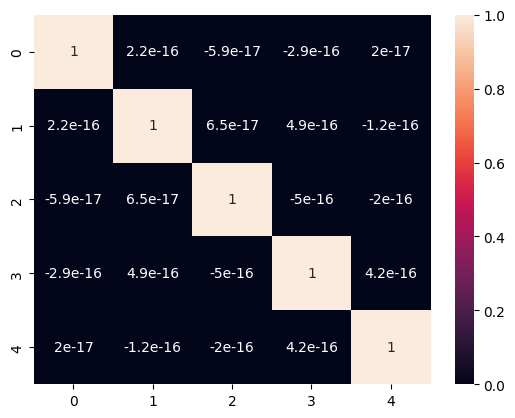

In [13]:
# Эталон
# X_pca = pca.fit_transform(X_scaled)
corrmat = np.corrcoef(X_pca.transpose())
sns.heatmap(corrmat, annot=True)

### Задание 7.7
Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

Судя по полученным результатам, сколько кластеров лучше всего взять?

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

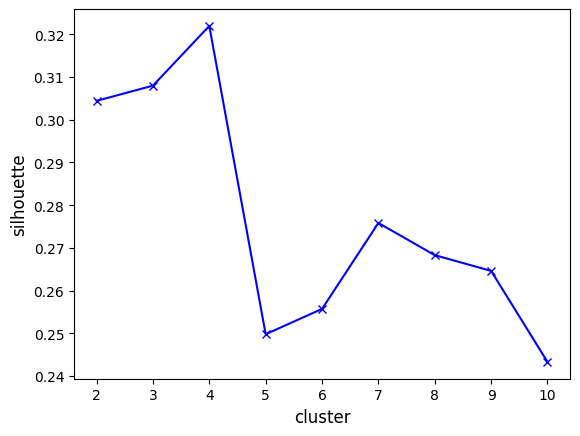

In [16]:
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', random_state=1) # ( init='k-means++', n_init=10)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(2, 11):
    silhouettes.append(get_silhouette(i, X_pca))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 11)], silhouettes, 'xb-')

### Задание 7.8

Теперь, когда оптимальное количество кластеров выбрано, реализуйте алгоритм k-means++ с этим параметром. В качестве значения random_state возьмите число 1.

В какой кластер попали страны, у которых самый высокий показатель детской смертности и самый низкий ВВП на душу населения?

In [23]:
model =  KMeans(n_clusters=4, init='k-means++', random_state=1)
df['labels'] = model.fit_predict(X_pca) # model.labels_

display(df[df['child_mort']==df['child_mort'].max()])
display(df[df['gdpp']==df['gdpp'].min()])


c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,8.92,11.6,39.2,764,12.3,57.7,6.26,231,1


c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

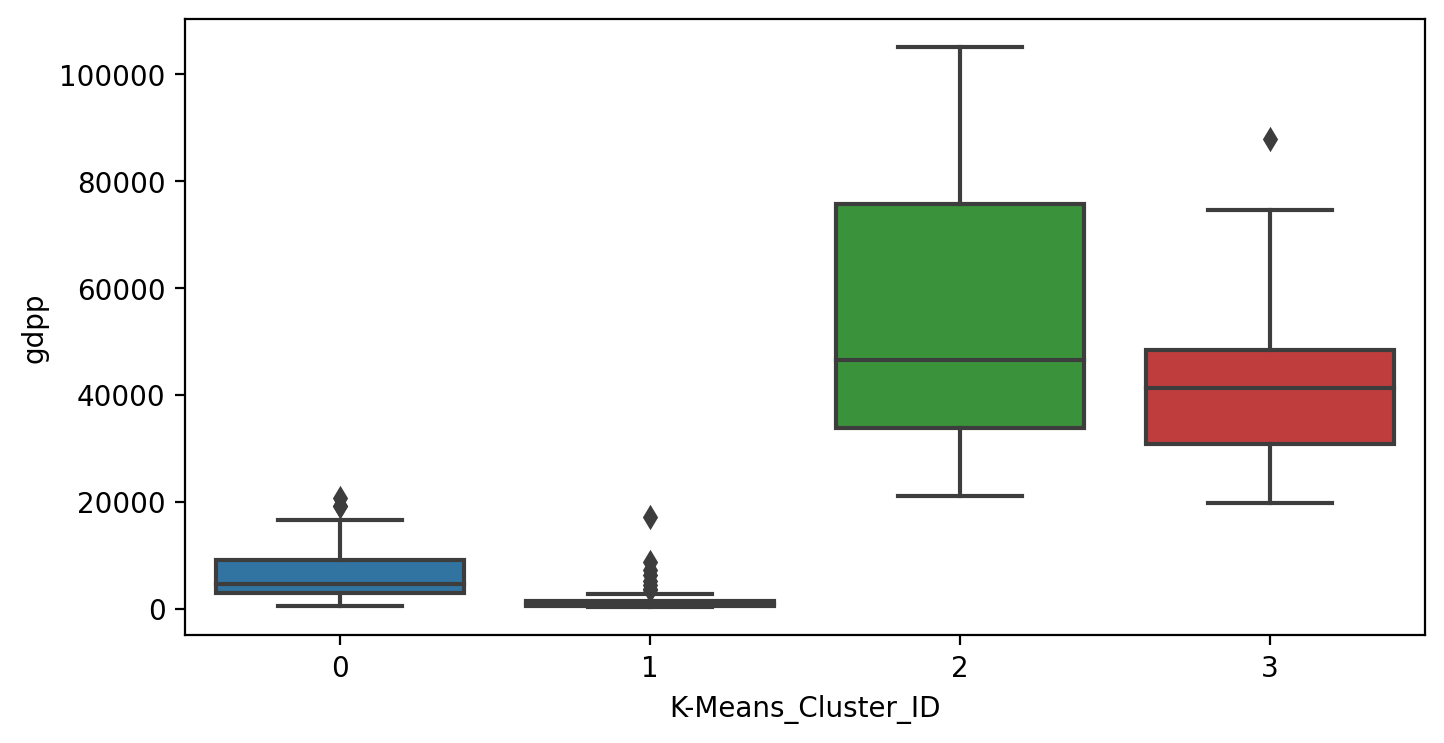

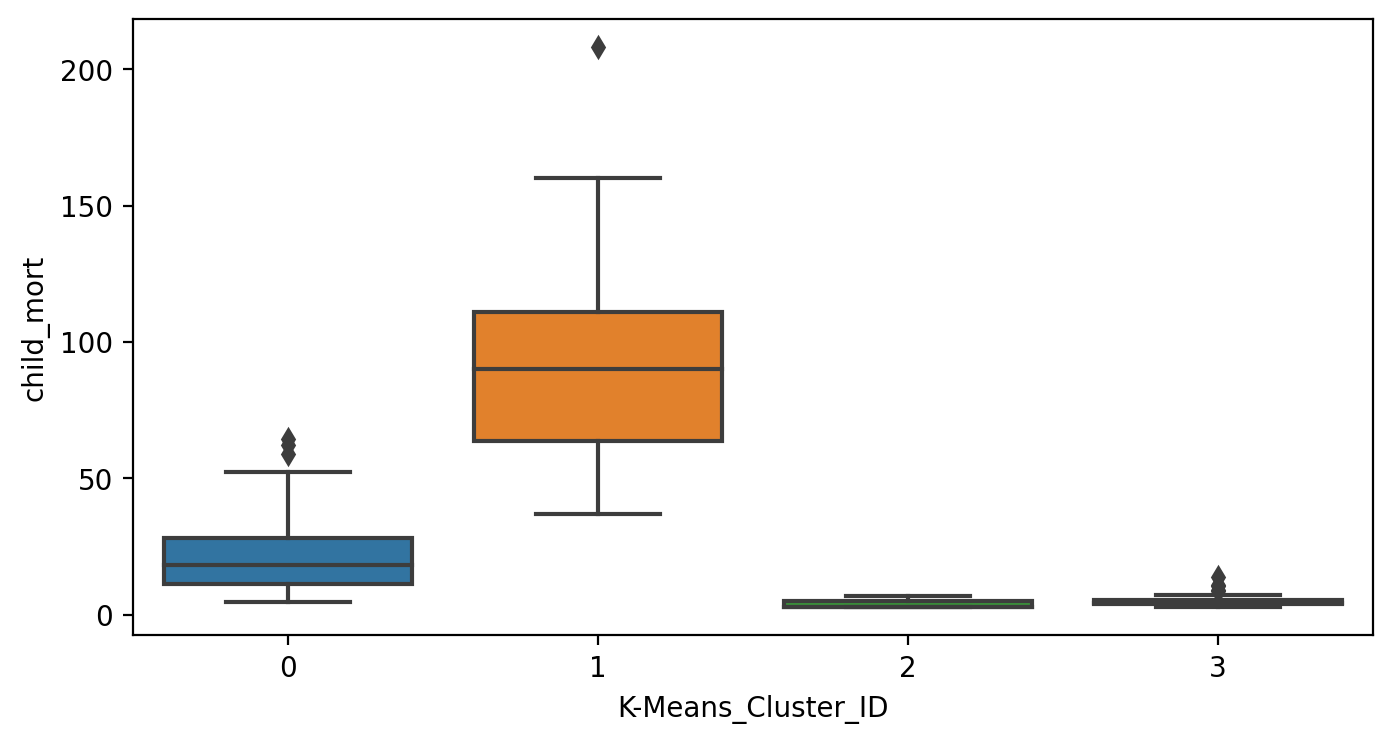

In [29]:
# Этолон
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_pca)
df['K-Means_Cluster_ID'] = kmeans.labels_
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=df)
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=df)

### Задание 7.9
Итак, мы понимаем, что именно в выбранном нами кластере находятся страны, которые особенно остро нуждаются в финансовой помощи. Однако на все страны у нас не хватит ресурсов, поэтому давайте выберем из выделенного кластера три страны, в которых самая маленькая продолжительность жизни.

In [28]:
df[df['labels']==1].sort_values(by='life_expec',ascending=True).head(3)['country']

66                       Haiti
87                     Lesotho
31    Central African Republic
Name: country, dtype: object

* country — название страны;
* child_mort — показатель смертности детей до 5 лет;
* exports — показатель экспорта на душу населения;
* health — показатель затрат на здравоохранение на душу населения;
* imports — показатель импорта на душу населения;
* Income — средний доход на душу населения;
* Inflation — годовой показатель инфляции;
* life_expec — средняя продолжительность жизни;
* total_fer — суммарный коэффициент рождаемости;
* gdpp — значение ВВП на душу населения.